In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Admission_Predict.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
dataset.drop(['Serial No.'], axis=1, inplace=True)

In [4]:
dataset.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
dataset.corr()      # Correlation

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


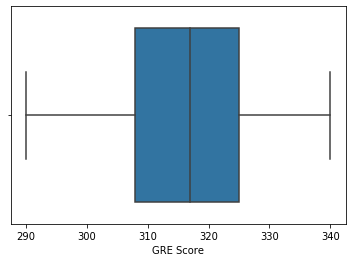

In [6]:
import seaborn as sns

sns.boxplot(x=dataset['GRE Score'])

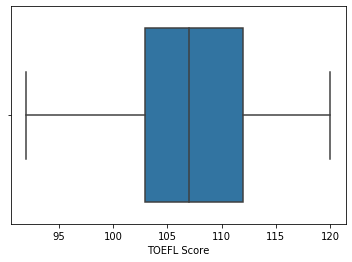

In [7]:
sns.boxplot(x=dataset['TOEFL Score'])

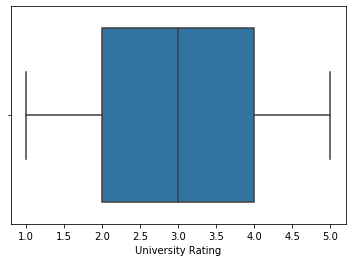

In [8]:
sns.boxplot(x=dataset['University Rating'])

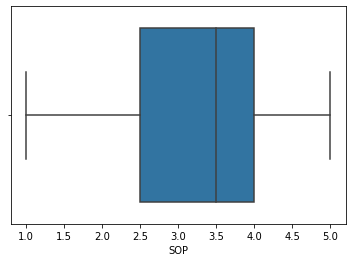

In [9]:
sns.boxplot(x=dataset['SOP'])

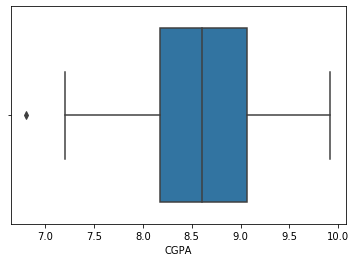

In [10]:
sns.boxplot(x=dataset['CGPA'])

In [11]:
dataset = dataset.sort_values(['CGPA'], axis=0)
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.80,1,0.36
28,295,93,1,2.0,2.0,7.20,0,0.46
348,302,99,1,2.0,2.0,7.25,0,0.57
118,296,99,2,3.0,3.5,7.28,0,0.47
29,310,99,2,1.5,2.0,7.30,0,0.54
...,...,...,...,...,...,...,...,...
24,336,119,5,4.0,3.5,9.80,1,0.97
385,335,117,5,5.0,5.0,9.82,1,0.96
203,334,120,5,4.0,5.0,9.87,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97


In [12]:
dataset.drop(58, axis=0, inplace=True)

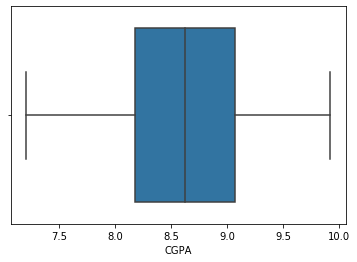

In [13]:
sns.boxplot(x=dataset['CGPA'])

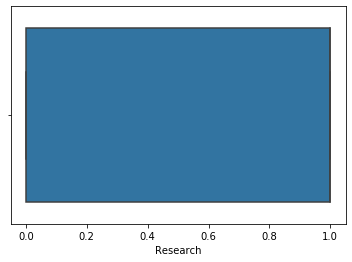

In [14]:
sns.boxplot(x=dataset['Research'])

In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

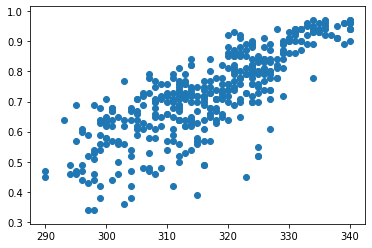

In [17]:
plt.scatter(X[:,0], y)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
y_train = (y_train > 0.5)
y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [20]:
y_test = (y_test > 0.5)
y_test

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True])

# Model Building

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

G:\Anaconda3\Anaconda3_Navigator\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = lr.predict(X_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [23]:
X_test

array([[316.  , 101.  ,   2.  ,   2.5 ,   2.  ,   8.32,   1.  ],
       [317.  , 110.  ,   3.  ,   4.  ,   4.5 ,   9.11,   1.  ],
       [320.  , 110.  ,   5.  ,   5.  ,   5.  ,   9.2 ,   1.  ],
       [320.  , 104.  ,   3.  ,   3.  ,   2.5 ,   8.57,   1.  ],
       [314.  , 109.  ,   4.  ,   3.5 ,   4.  ,   8.77,   1.  ],
       [306.  , 100.  ,   2.  ,   3.  ,   3.  ,   8.  ,   0.  ],
       [311.  , 104.  ,   3.  ,   4.5 ,   4.5 ,   8.43,   0.  ],
       [322.  , 104.  ,   3.  ,   3.5 ,   4.  ,   8.84,   1.  ],
       [308.  , 103.  ,   2.  ,   2.5 ,   4.  ,   8.36,   1.  ],
       [319.  , 103.  ,   4.  ,   4.5 ,   3.5 ,   8.66,   0.  ],
       [315.  , 103.  ,   1.  ,   1.5 ,   2.  ,   7.86,   0.  ],
       [310.  , 106.  ,   2.  ,   3.5 ,   2.5 ,   8.33,   0.  ],
       [314.  , 102.  ,   2.  ,   2.  ,   2.5 ,   8.24,   0.  ],
       [333.  , 113.  ,   5.  ,   4.  ,   4.  ,   9.28,   1.  ],
       [290.  , 104.  ,   4.  ,   2.  ,   2.5 ,   7.46,   0.  ],
       [309.  , 106.  ,  

In [24]:
y_test

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True])

Accuracy Score

In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score

accuracy_score(y_test, y_pred) * 100

90.0

Recall Score

In [26]:
recall_score(y_test, y_pred) * 100

98.55072463768117

AUC-ROC Curve

In [27]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6745718050065876

Confusion Matrix

In [28]:
confusion_matrix(y_test, y_pred)

array([[ 4,  7],
       [ 1, 68]], dtype=int64)

# Save the Model

In [29]:
import pickle

pickle.dump(lr, open('university.pkl','wb'))